In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
from sklearn.preprocessing import OrdinalEncoder

OE=OrdinalEncoder()
for i in df.columns:
  if df[i].dtypes == object:
    df[i] = OE.fit_transform(df[i].values.reshape(-1,1))




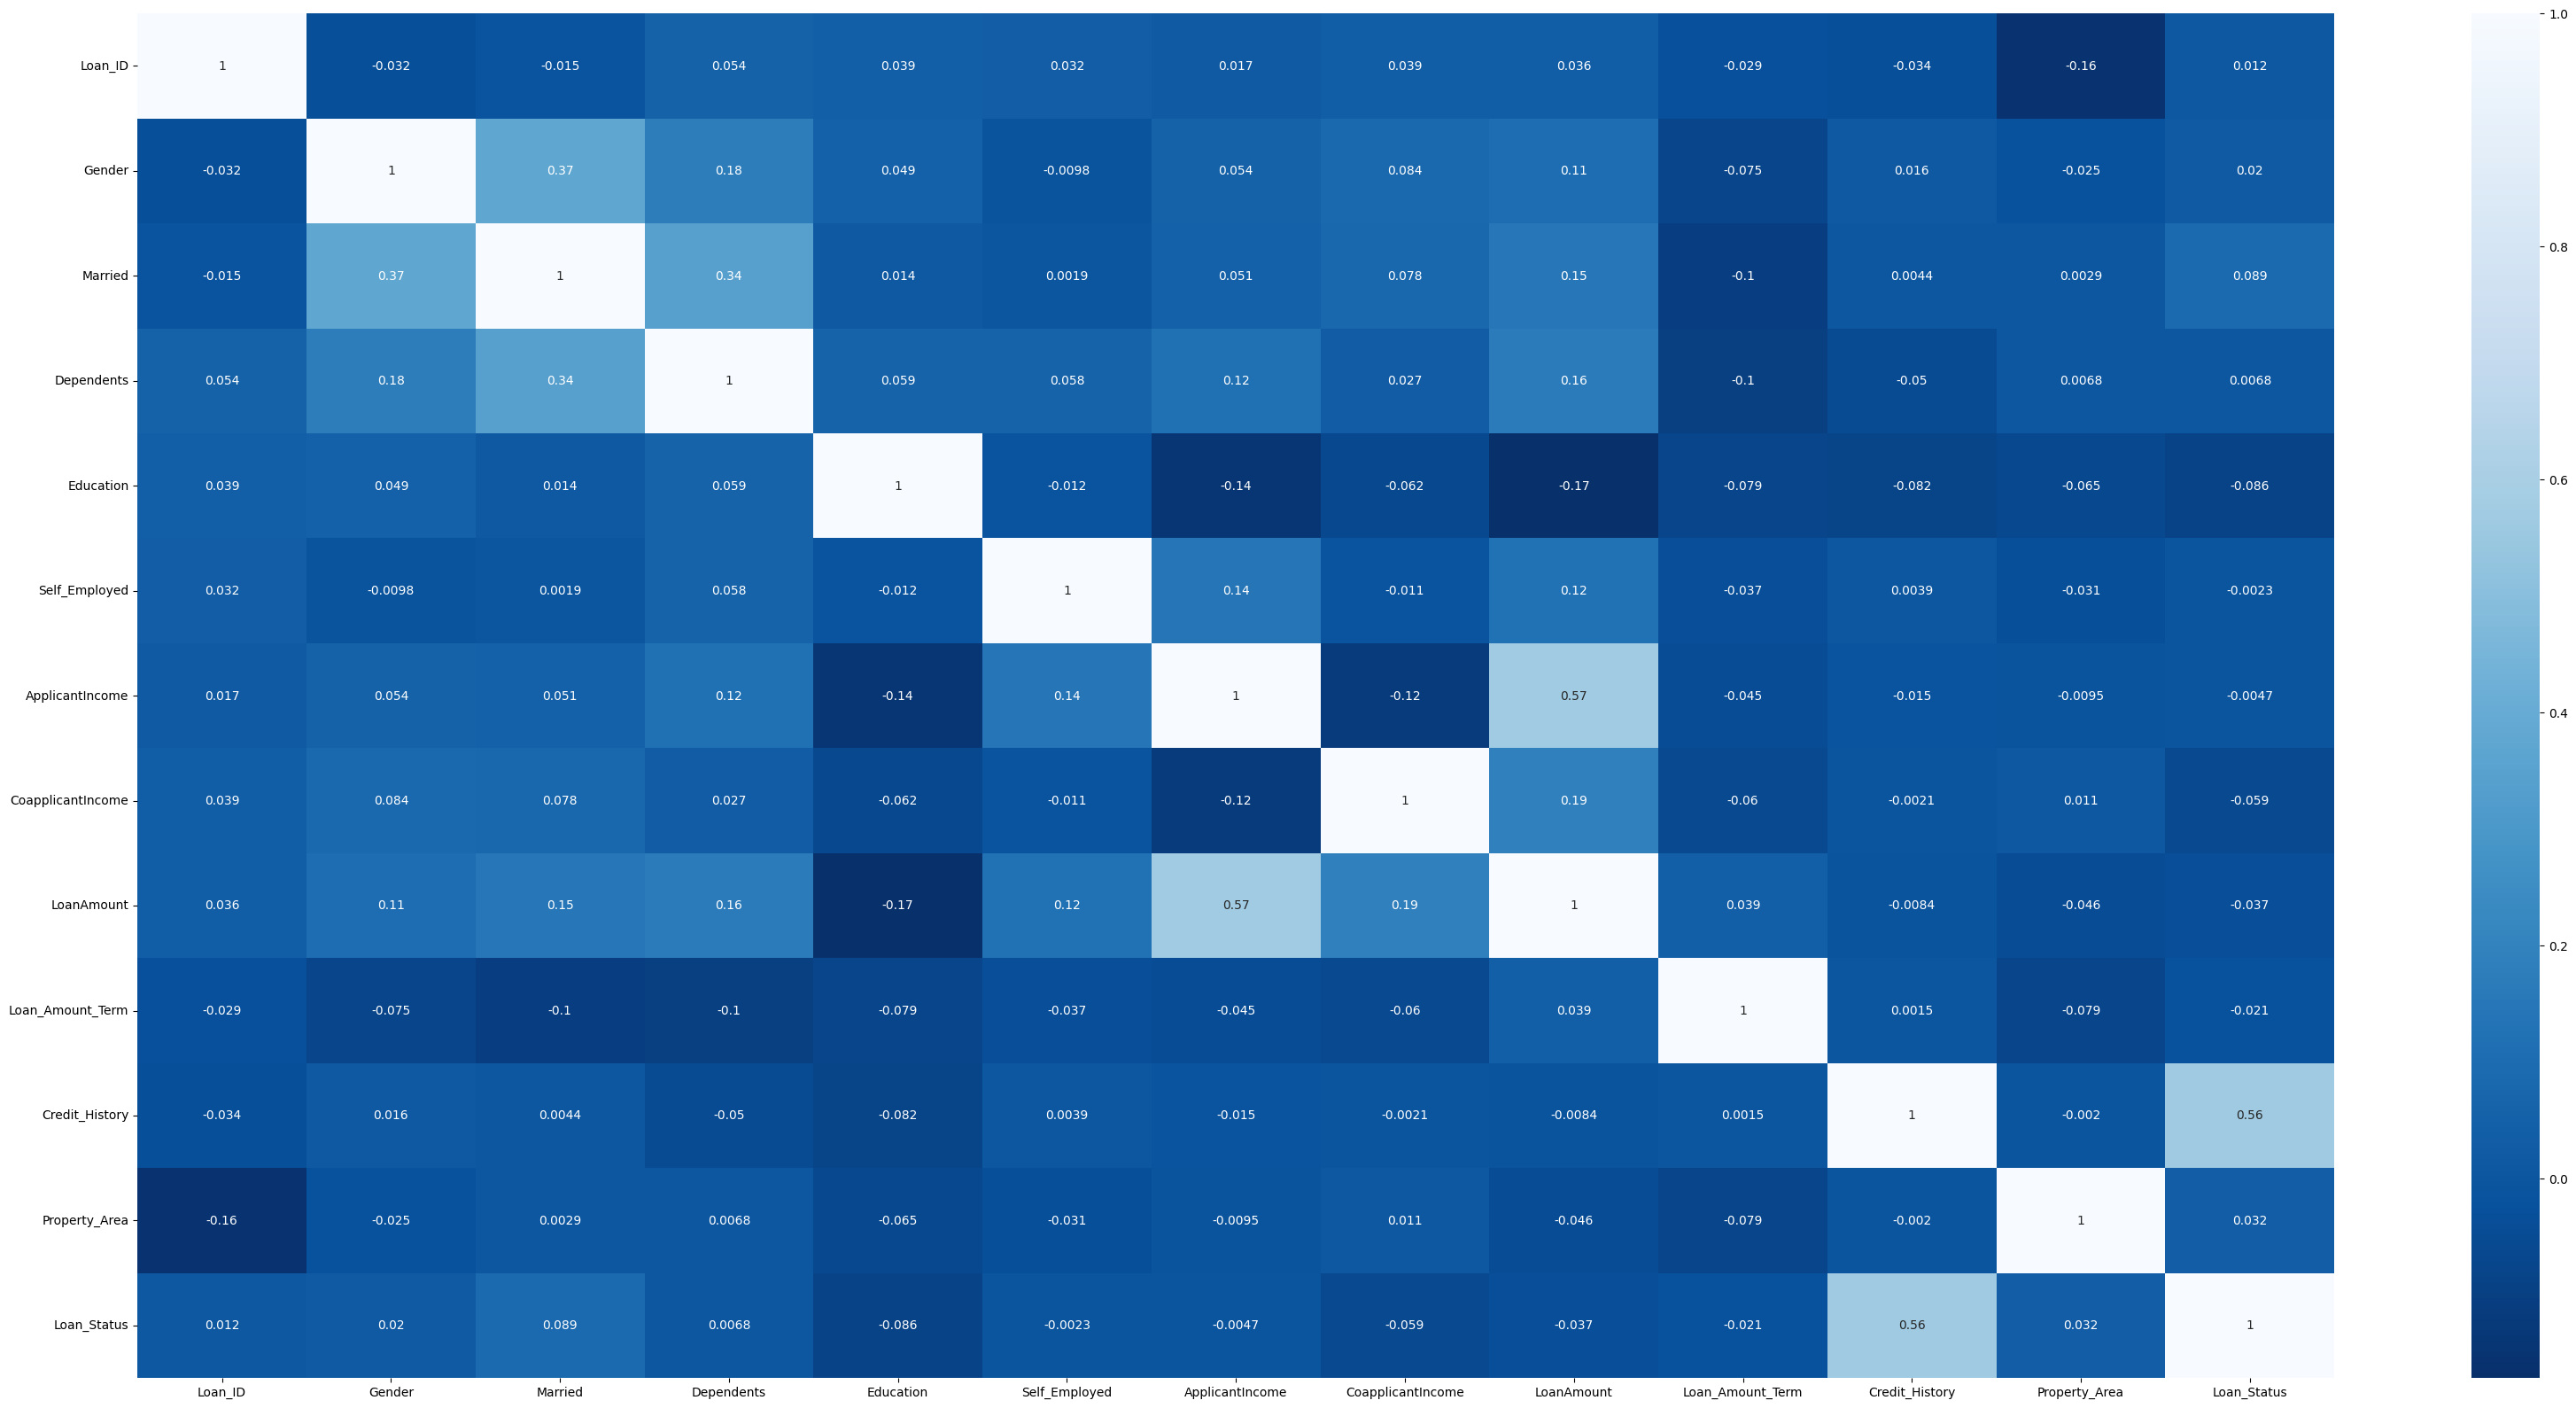

In [3]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot = True, cmap ="Blues_r")
plt.show()

In [4]:
df.drop(['Loan_ID','Gender'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.fillna(df.mean(),inplace=True)

In [7]:
df.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.651391,0.762938,0.218241,0.140893,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.475752,1.002718,0.413389,0.339000,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [9]:
df.skew()

Married             -0.638509
Dependents           0.990764
Education            1.367622
Self_Employed        2.125544
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [10]:
df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,2.0,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


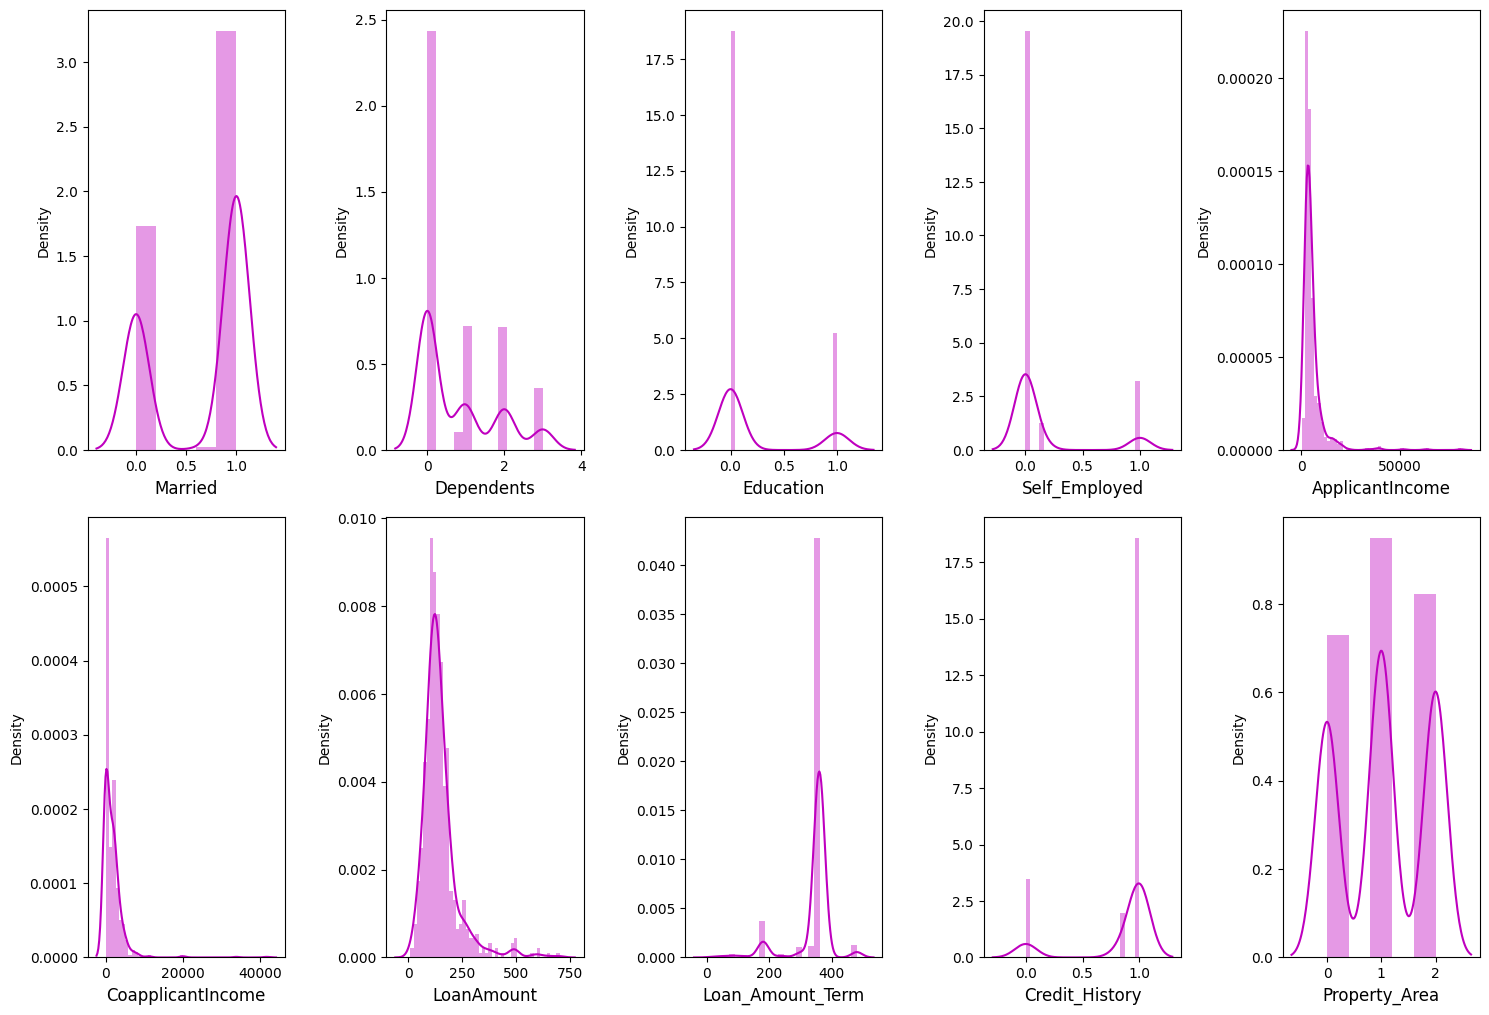

In [11]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#by distplot we can observe skwness in data

In [12]:
numeric_columns = df.select_dtypes(include=np.number).columns
skewness_threshold = 0.5  # You can adjust this threshold as needed

# Apply cube root transformation to columns with skewness above the threshold
for col in numeric_columns:
    if df[col].skew() > skewness_threshold:
        df[col] = np.cbrt(df[col])

# You can check the skewness after the transformation
skewness_after = df[numeric_columns].apply(lambda x: x.skew())
print("Skewness after transformation:")
print(skewness_after)

Skewness after transformation:
Married             -0.638509
Dependents           0.367524
Education            1.367622
Self_Employed        1.838710
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64


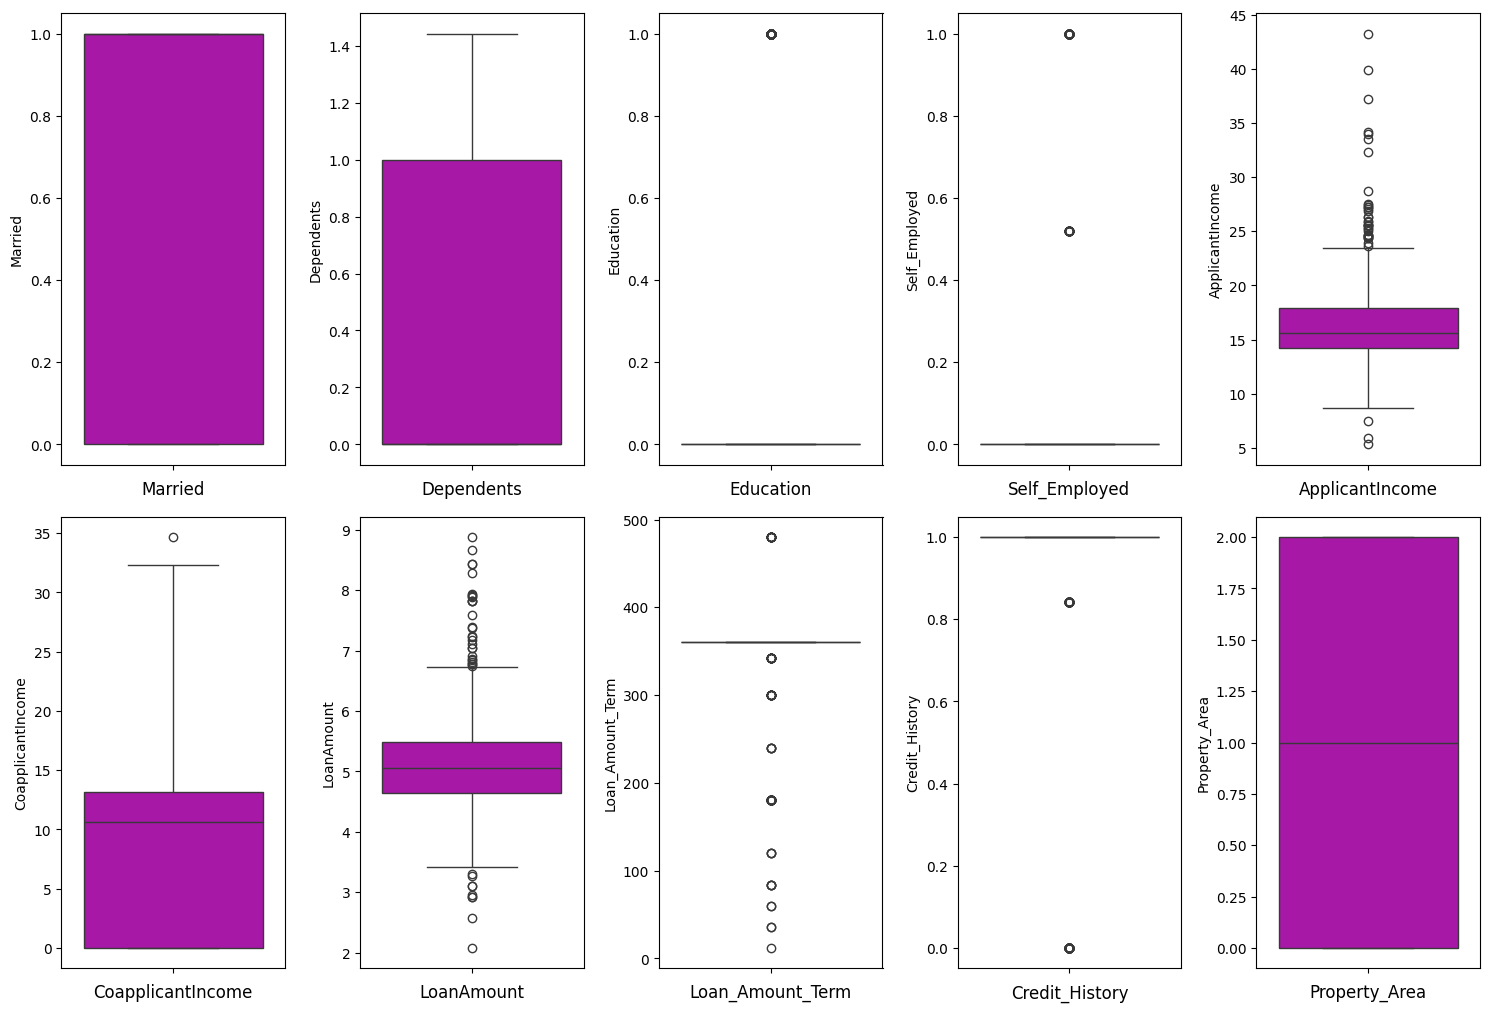

In [13]:
plt.figure(figsize=(15,25), facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=10:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1

plt.tight_layout()

#not any outlier is present in graph

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    float64
 1   Dependents         614 non-null    float64
 2   Education          614 non-null    float64
 3   Self_Employed      614 non-null    float64
 4   ApplicantIncome    614 non-null    float64
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    float64
 10  Loan_Status        614 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


In [15]:
from scipy.stats import zscore
out_features=df[['LoanAmount','Loan_Amount_Term','ApplicantIncome','Credit_History']]
z=np.abs(zscore(out_features))
z

,LoanAmount,Loan_Amount_Term,ApplicantIncome,Credit_History
0,0.169528,0.279851,0.380325,0.451640
1,0.100752,0.279851,0.022870,0.451640
2,1.269462,0.279851,0.533028,0.451640
3,0.226303,0.279851,0.711341,0.451640
4,0.092554,0.279851,0.419383,0.451640
...,...,...,...,...
609,1.152903,0.279851,0.574203,0.451640
610,1.996700,2.518655,0.128936,0.451640
611,1.403404,0.279851,0.899211,0.451640
612,0.693799,0.279851,0.794146,0.451640


In [16]:
df1=df[(z<3).all(axis=1)]
df1.shape

(584, 11)

In [17]:
df=df1

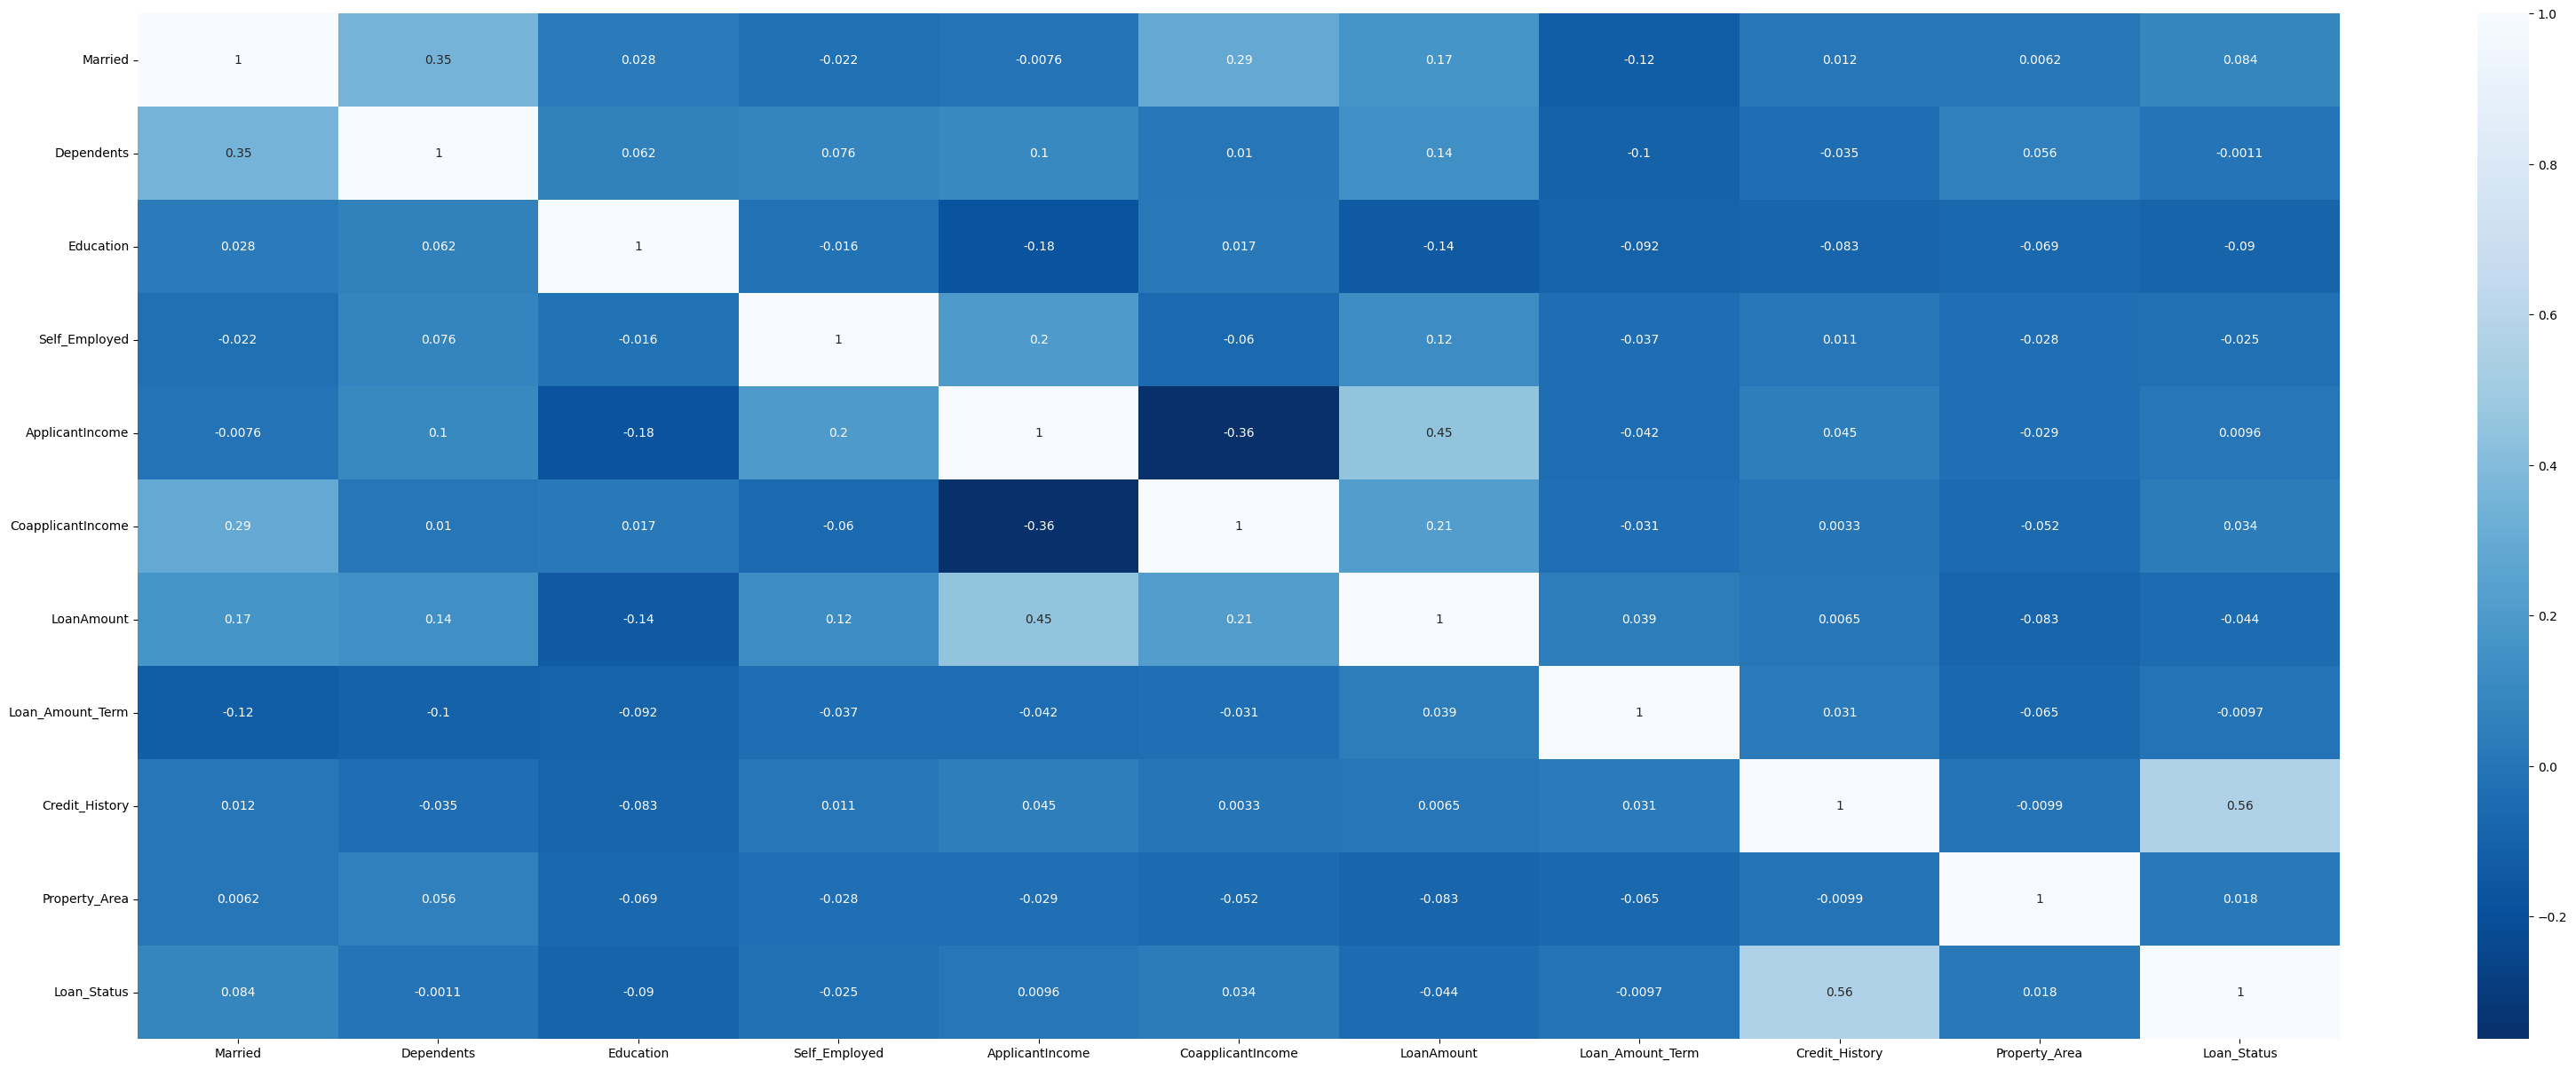

In [18]:
plt.figure(figsize=(40,15))
sns.heatmap(df.corr(),annot=True,cmap="Blues_r")
plt.show()

In [19]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =pd.DataFrame()
vif["VIF Values"]= [variance_inflation_factor(x.values,i)for i in range (len(x.columns))]

vif

,VIF Values
0,1.279786
1,1.191046
2,1.070551
3,1.049764
4,1.824650
5,1.569859
6,1.626127
7,1.047584
8,1.011901
9,1.026454


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [24]:
lg=LogisticRegression()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
GBC=GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC=BaggingClassifier()

model=[lg,RFC,ETC,GBC,ABC,BC]

for m in model:

  m.fit(x_train,y_train)
  m.score(x_train,y_train)
  predm=m.predict(x_test)
  print("accuracy score",m,"is")
  print(accuracy_score(y_test,predm)*100)
  print(confusion_matrix(y_test,predm))
  print(classification_report(y_test,predm))
  print('\n')

accuracy score LogisticRegression() is
82.95454545454545
[[ 23  30]
 [  0 123]]
              precision    recall  f1-score   support

         0.0       1.00      0.43      0.61        53
         1.0       0.80      1.00      0.89       123

    accuracy                           0.83       176
   macro avg       0.90      0.72      0.75       176
weighted avg       0.86      0.83      0.81       176



accuracy score RandomForestClassifier() is
78.97727272727273
[[ 27  26]
 [ 11 112]]
              precision    recall  f1-score   support

         0.0       0.71      0.51      0.59        53
         1.0       0.81      0.91      0.86       123

    accuracy                           0.79       176
   macro avg       0.76      0.71      0.73       176
weighted avg       0.78      0.79      0.78       176



accuracy score ExtraTreesClassifier() is
78.4090909090909
[[ 29  24]
 [ 14 109]]
              precision    recall  f1-score   support

         0.0       0.67      0.55      0.6

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
RFC = RandomForestClassifier()
ETC = ExtraTreesClassifier()
#GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
BC = BaggingClassifier()

model = [lg, RFC, ETC,ABC, BC]

for i in model:
  i.fit(x_train,y_train)
  score = cross_val_score(i, x, y)
  print(score)
  print(score.mean())

  # Make predictions on the test set
  pred = i.predict(x_test)

  # Calculate and print the difference between accuracy on test set and cross-validation mean
  print("Difference for", i, "model:", accuracy_score(y_test, pred) - score.mean())
  print('\n')


[0.81196581 0.79487179 0.77777778 0.86324786 0.82758621]
0.8150898909519599
Difference for LogisticRegression() model: 0.014455563593494647


[0.79487179 0.76068376 0.76068376 0.77777778 0.81034483]
0.7808723843206601
Difference for RandomForestClassifier() model: 0.025945797497521683


[0.76923077 0.74358974 0.74358974 0.79487179 0.78448276]
0.7671529619805482
Difference for ExtraTreesClassifier() model: 0.011256128928542775


[0.77777778 0.77777778 0.76923077 0.81196581 0.81896552]
0.7911435307987034
Difference for AdaBoostClassifier() model: 0.004311014655842049


[0.75213675 0.76068376 0.76923077 0.74358974 0.79310345]
0.7637488947833775
Difference for BaggingClassifier() model: -0.008067076601559253




In [31]:
from sklearn.model_selection import GridSearchCV

parameter={

    'penalty':['l1', 'l2', 'elasticnet'],
    'C':[10,50,100],
    'intercept_scaling':[0,10,20],
    'n_jobs':[-2,-1,1],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

}



In [34]:
GCV=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [35]:
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 50, 100], 'intercept_scaling': [0, 10, 20],
                         'n_jobs': [-2, -1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [36]:
GCV.best_params_

{'C': 10,
 'intercept_scaling': 10,
 'n_jobs': -2,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [49]:
Final_model = LogisticRegression(solver= 'liblinear',
 intercept_scaling = 10,
 #penalty= 'l1',
 n_jobs= -2,
 C = 10)

In [50]:
import joblib
joblib.dump(Final_model,'Loan_Status.pkl')

['Loan_Status.pkl']

In [51]:
model=joblib.load('Loan_Status.pkl')

In [52]:

# Assuming you have already created an instance of LogisticRegression, e.g., model = LogisticRegression()
model.fit(x_train, y_train)  # Make sure to replace x_train and y_train with your actual training data

# Now you can make predictions
predictions = model.predict(x_test)  # Replace x_test with your actual test data


In [53]:
a=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['predicted']= predictions
df_pred['original']=a
df_pred

,predicted,original
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
171,1.0,1.0
172,0.0,0.0
173,1.0,1.0
174,0.0,0.0
